In [10]:
!pip install pandas matplotlib seaborn numpy

  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 648.8 kB/s eta 0:00:00
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp311-cp311-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    ---------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo de las gráficas
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

Cargar Datos

In [12]:
# Cargar los datos del archivo CSV
df = pd.read_csv('resultados.csv')

# Mostrar un resumen de los datos
print("Información del conjunto de datos:")
print(f"Número de corridas: {len(df)}")
print("\nResumen estadístico:")
df.describe()

Información del conjunto de datos:
Número de corridas: 30

Resumen estadístico:


,corrida,fitness,tiempo_ejecucion,interaccion,calificacion_blosum
count,30.000000,30.000000,30.000000,30.0,30.0
mean,15.500000,14.393333,39.086529,1.0,1.0
std,8.803408,0.036515,2.321289,0.0,0.0
min,1.000000,14.200000,36.534579,1.0,1.0
25%,8.250000,14.400000,37.327693,1.0,1.0
50%,15.500000,14.400000,38.180114,1.0,1.0
75%,22.750000,14.400000,40.615302,1.0,1.0
max,30.000000,14.400000,44.636338,1.0,1.0


Gráfica de línea para fitness

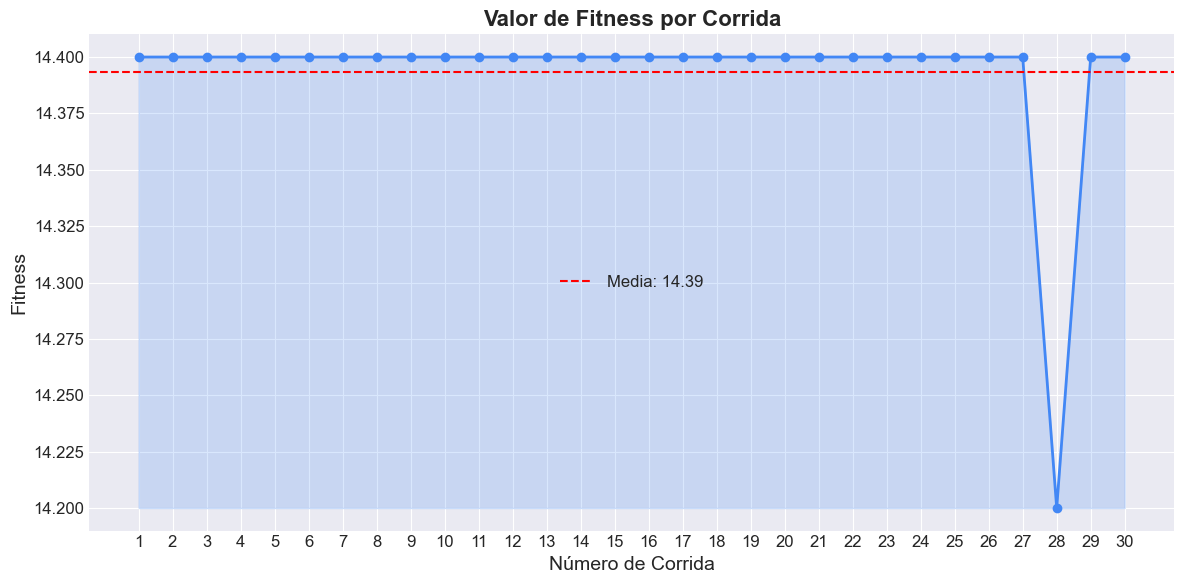

In [13]:
# Gráfica de línea para fitness
plt.figure(figsize=(12, 6))
plt.plot(df['corrida'], df['fitness'], marker='o', linestyle='-', linewidth=2, color='#4287f5')
plt.axhline(y=df['fitness'].mean(), color='red', linestyle='--', label=f'Media: {df["fitness"].mean():.2f}')
plt.fill_between(df['corrida'], df['fitness'].min(), df['fitness'], alpha=0.2, color='#4287f5')
plt.title('Valor de Fitness por Corrida', fontsize=16, fontweight='bold')
plt.xlabel('Número de Corrida', fontsize=14)
plt.ylabel('Fitness', fontsize=14)
plt.grid(True)
plt.xticks(df['corrida'])
plt.legend()
plt.tight_layout()
plt.savefig('fitness_linea.png', dpi=300)
plt.show()

Gráfica de barras para fitness

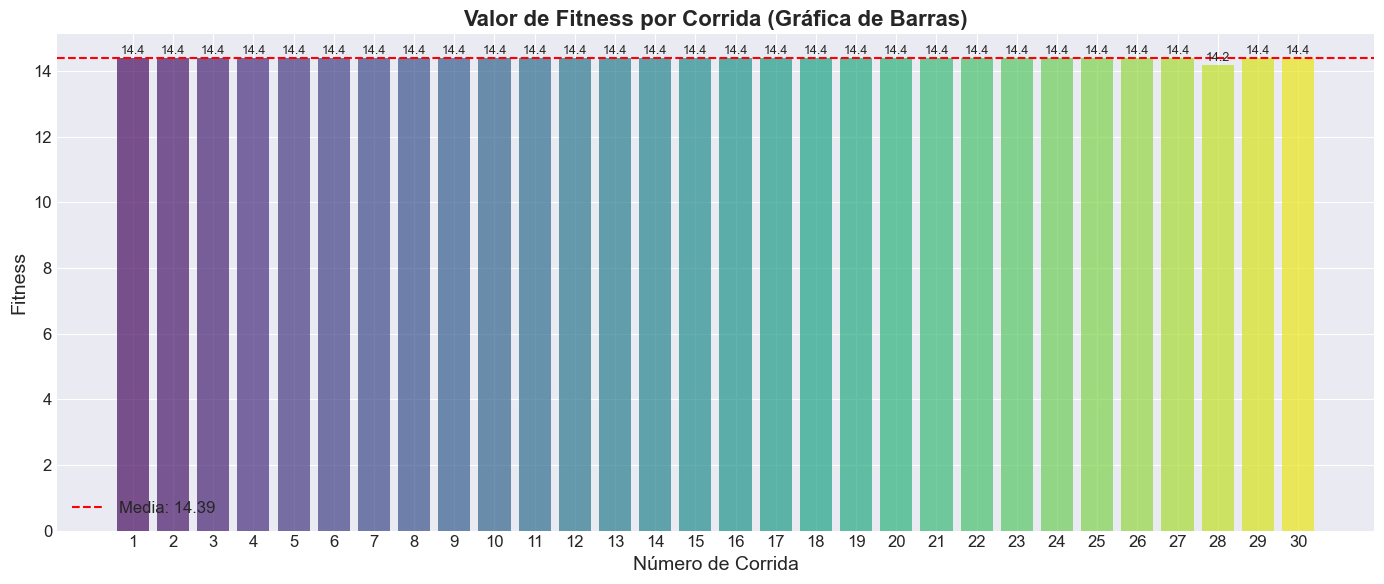

In [14]:
# Gráfica de barras para fitness
plt.figure(figsize=(14, 6))
bars = plt.bar(df['corrida'], df['fitness'], alpha=0.7, color=sns.color_palette("viridis", len(df)))
plt.axhline(y=df['fitness'].mean(), color='red', linestyle='--', label=f'Media: {df["fitness"].mean():.2f}')

# Añadir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height+0.02, f'{height:.1f}', 
             ha='center', va='bottom', fontsize=9)

plt.title('Valor de Fitness por Corrida (Gráfica de Barras)', fontsize=16, fontweight='bold')
plt.xlabel('Número de Corrida', fontsize=14)
plt.ylabel('Fitness', fontsize=14)
plt.grid(True, axis='y')
plt.xticks(df['corrida'])
plt.legend()
plt.tight_layout()
plt.savefig('fitness_barras.png', dpi=300)
plt.show()

Gráfica de línea para tiempo de ejecución

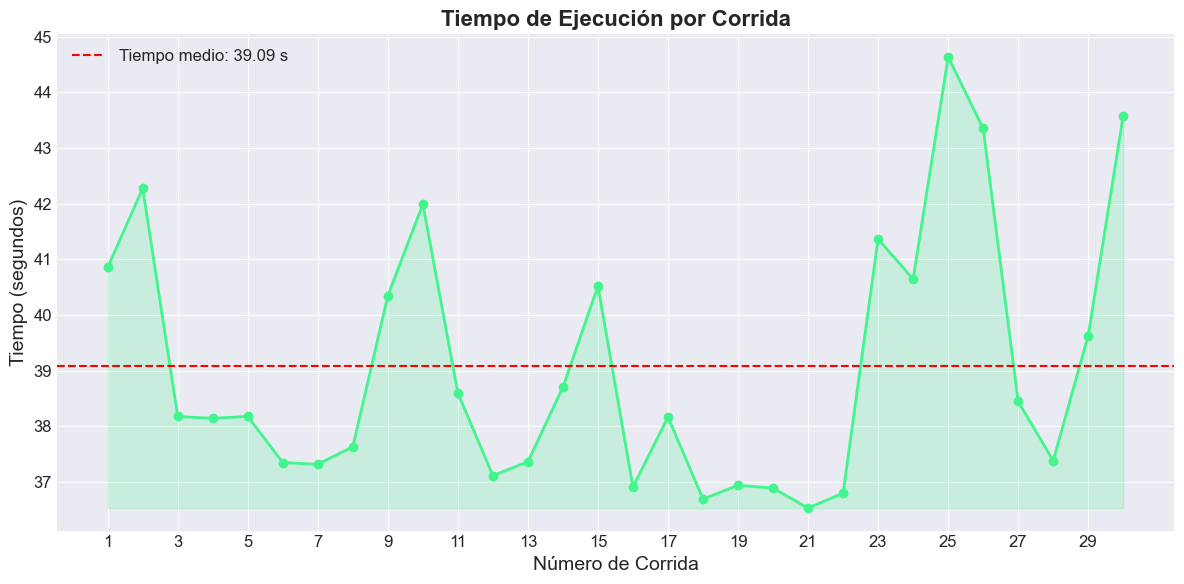

In [15]:
# Gráfica de línea para tiempo de ejecución
plt.figure(figsize=(12, 6))
plt.plot(df['corrida'], df['tiempo_ejecucion'], marker='o', linestyle='-', linewidth=2, color='#42f58d')
plt.axhline(y=df['tiempo_ejecucion'].mean(), color='red', linestyle='--', 
            label=f'Tiempo medio: {df["tiempo_ejecucion"].mean():.2f} s')
plt.fill_between(df['corrida'], df['tiempo_ejecucion'].min(), df['tiempo_ejecucion'], alpha=0.2, color='#42f58d')
plt.title('Tiempo de Ejecución por Corrida', fontsize=16, fontweight='bold')
plt.xlabel('Número de Corrida', fontsize=14)
plt.ylabel('Tiempo (segundos)', fontsize=14)
plt.grid(True)
plt.xticks(df['corrida'][::2])  # Mostrar cada segundo número para no sobrecargar el eje x
plt.legend()
plt.tight_layout()
plt.savefig('tiempo_ejecucion_linea.png', dpi=300)
plt.show()

Boxplot para tiempo de ejecución

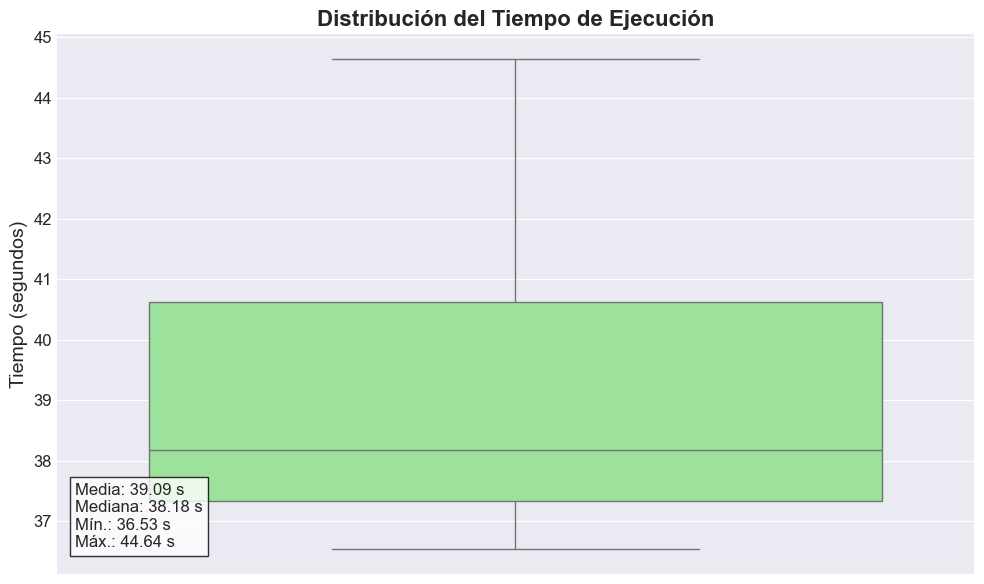

In [16]:
# Boxplot para tiempo de ejecución
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['tiempo_ejecucion'], color='lightgreen')
plt.title('Distribución del Tiempo de Ejecución', fontsize=16, fontweight='bold')
plt.ylabel('Tiempo (segundos)', fontsize=14)
plt.grid(True, axis='y')

# Añadir estadísticas al gráfico
stats_text = (f"Media: {df['tiempo_ejecucion'].mean():.2f} s\n"
              f"Mediana: {df['tiempo_ejecucion'].median():.2f} s\n"
              f"Mín.: {df['tiempo_ejecucion'].min():.2f} s\n"
              f"Máx.: {df['tiempo_ejecucion'].max():.2f} s")
plt.text(0.02, 0.05, stats_text, transform=plt.gca().transAxes, fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('tiempo_ejecucion_boxplot.png', dpi=300)
plt.show()

Gráfica de línea para interacción

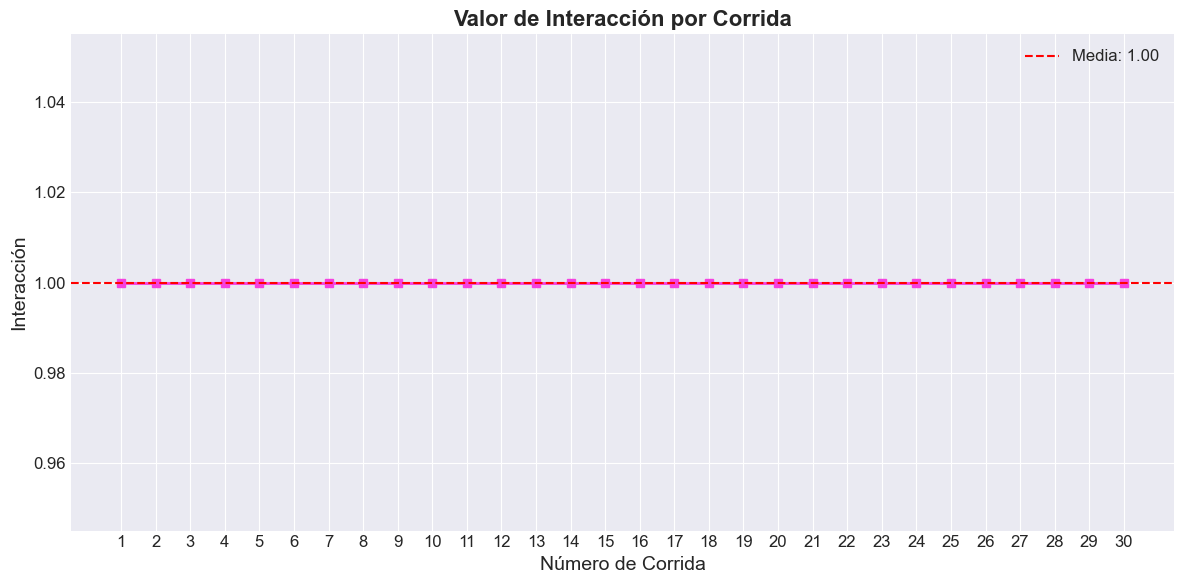

In [17]:
# Gráfica de línea para interacción
plt.figure(figsize=(12, 6))
plt.plot(df['corrida'], df['interaccion'], marker='s', linestyle='-', linewidth=2, color='#f542e0')
plt.axhline(y=df['interaccion'].mean(), color='red', linestyle='--', label=f'Media: {df["interaccion"].mean():.2f}')
plt.fill_between(df['corrida'], df['interaccion'].min(), df['interaccion'], alpha=0.2, color='#f542e0')
plt.title('Valor de Interacción por Corrida', fontsize=16, fontweight='bold')
plt.xlabel('Número de Corrida', fontsize=14)
plt.ylabel('Interacción', fontsize=14)
plt.grid(True)
plt.xticks(df['corrida'])
plt.legend()
plt.tight_layout()
plt.savefig('interaccion_linea.png', dpi=300)
plt.show()

Histograma para interacción

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1388\1626422742.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df['interaccion'], color='red', label='Densidad')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1388\1626422742.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


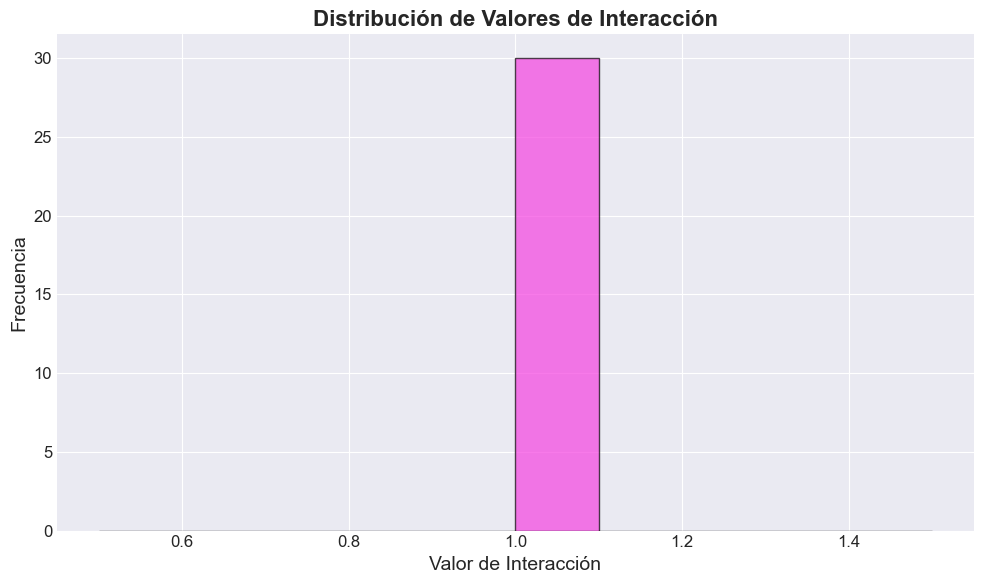

In [18]:
# Histograma para interacción
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['interaccion'], bins=10, alpha=0.7, color='#f542e0', edgecolor='black')

# Agregar una línea de densidad
sns.kdeplot(df['interaccion'], color='red', label='Densidad')

plt.title('Distribución de Valores de Interacción', fontsize=16, fontweight='bold')
plt.xlabel('Valor de Interacción', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.savefig('interaccion_histograma.png', dpi=300)
plt.show()

Gráfica de línea para calificación BLOSUM

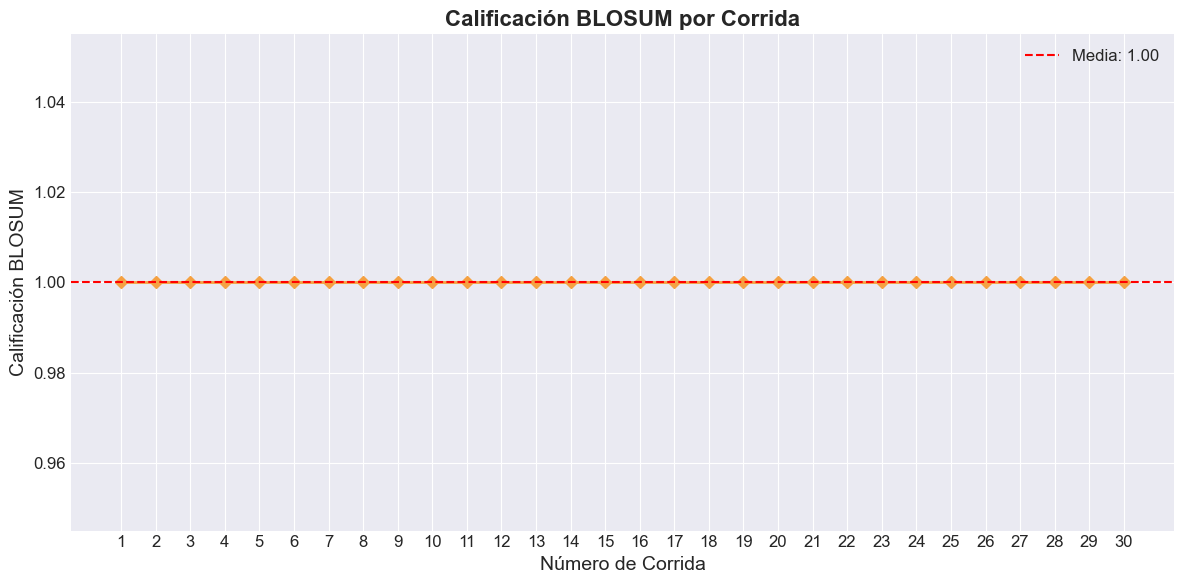

In [19]:
# Gráfica de línea para calificación BLOSUM
plt.figure(figsize=(12, 6))
plt.plot(df['corrida'], df['calificacion_blosum'], marker='D', linestyle='-', linewidth=2, color='#f5a142')
plt.axhline(y=df['calificacion_blosum'].mean(), color='red', linestyle='--', 
            label=f'Media: {df["calificacion_blosum"].mean():.2f}')
plt.fill_between(df['corrida'], df['calificacion_blosum'].min(), df['calificacion_blosum'], 
                 alpha=0.2, color='#f5a142')
plt.title('Calificación BLOSUM por Corrida', fontsize=16, fontweight='bold')
plt.xlabel('Número de Corrida', fontsize=14)
plt.ylabel('Calificación BLOSUM', fontsize=14)
plt.grid(True)
plt.xticks(df['corrida'])
plt.legend()
plt.tight_layout()
plt.savefig('blosum_linea.png', dpi=300)
plt.show()

Gráfica de dispersión para calificación BLOSUM

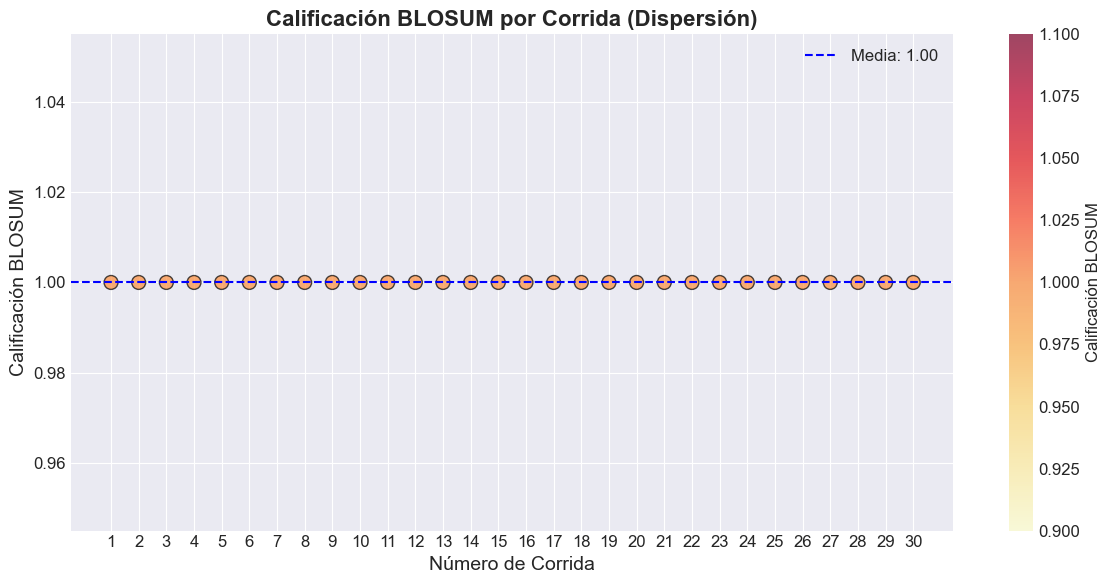

In [20]:
# Gráfica de dispersión para calificación BLOSUM
plt.figure(figsize=(12, 6))
plt.scatter(df['corrida'], df['calificacion_blosum'], s=100, c=df['calificacion_blosum'], 
            cmap='YlOrRd', alpha=0.7, edgecolors='black')
plt.colorbar(label='Calificación BLOSUM')
plt.axhline(y=df['calificacion_blosum'].mean(), color='blue', linestyle='--', 
            label=f'Media: {df["calificacion_blosum"].mean():.2f}')
plt.title('Calificación BLOSUM por Corrida (Dispersión)', fontsize=16, fontweight='bold')
plt.xlabel('Número de Corrida', fontsize=14)
plt.ylabel('Calificación BLOSUM', fontsize=14)
plt.grid(True)
plt.xticks(df['corrida'])
plt.legend()
plt.tight_layout()
plt.savefig('blosum_scatter.png', dpi=300)
plt.show()

Matriz de correlación

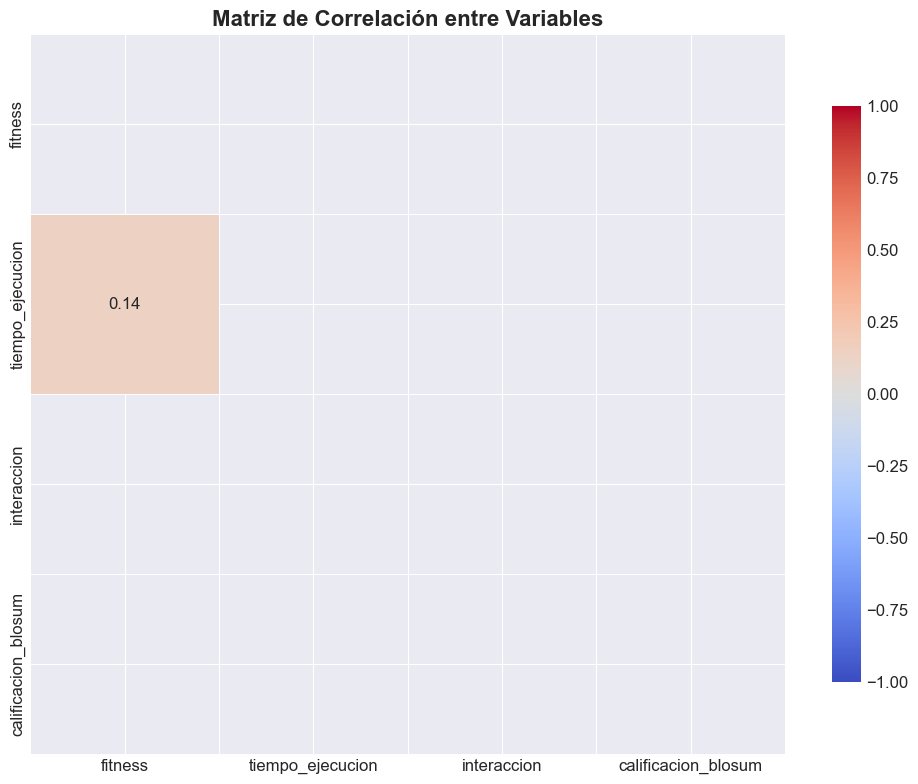

In [21]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop('corrida', axis=1).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación entre Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('matriz_correlacion.png', dpi=300)
plt.show()

Dashboard Final

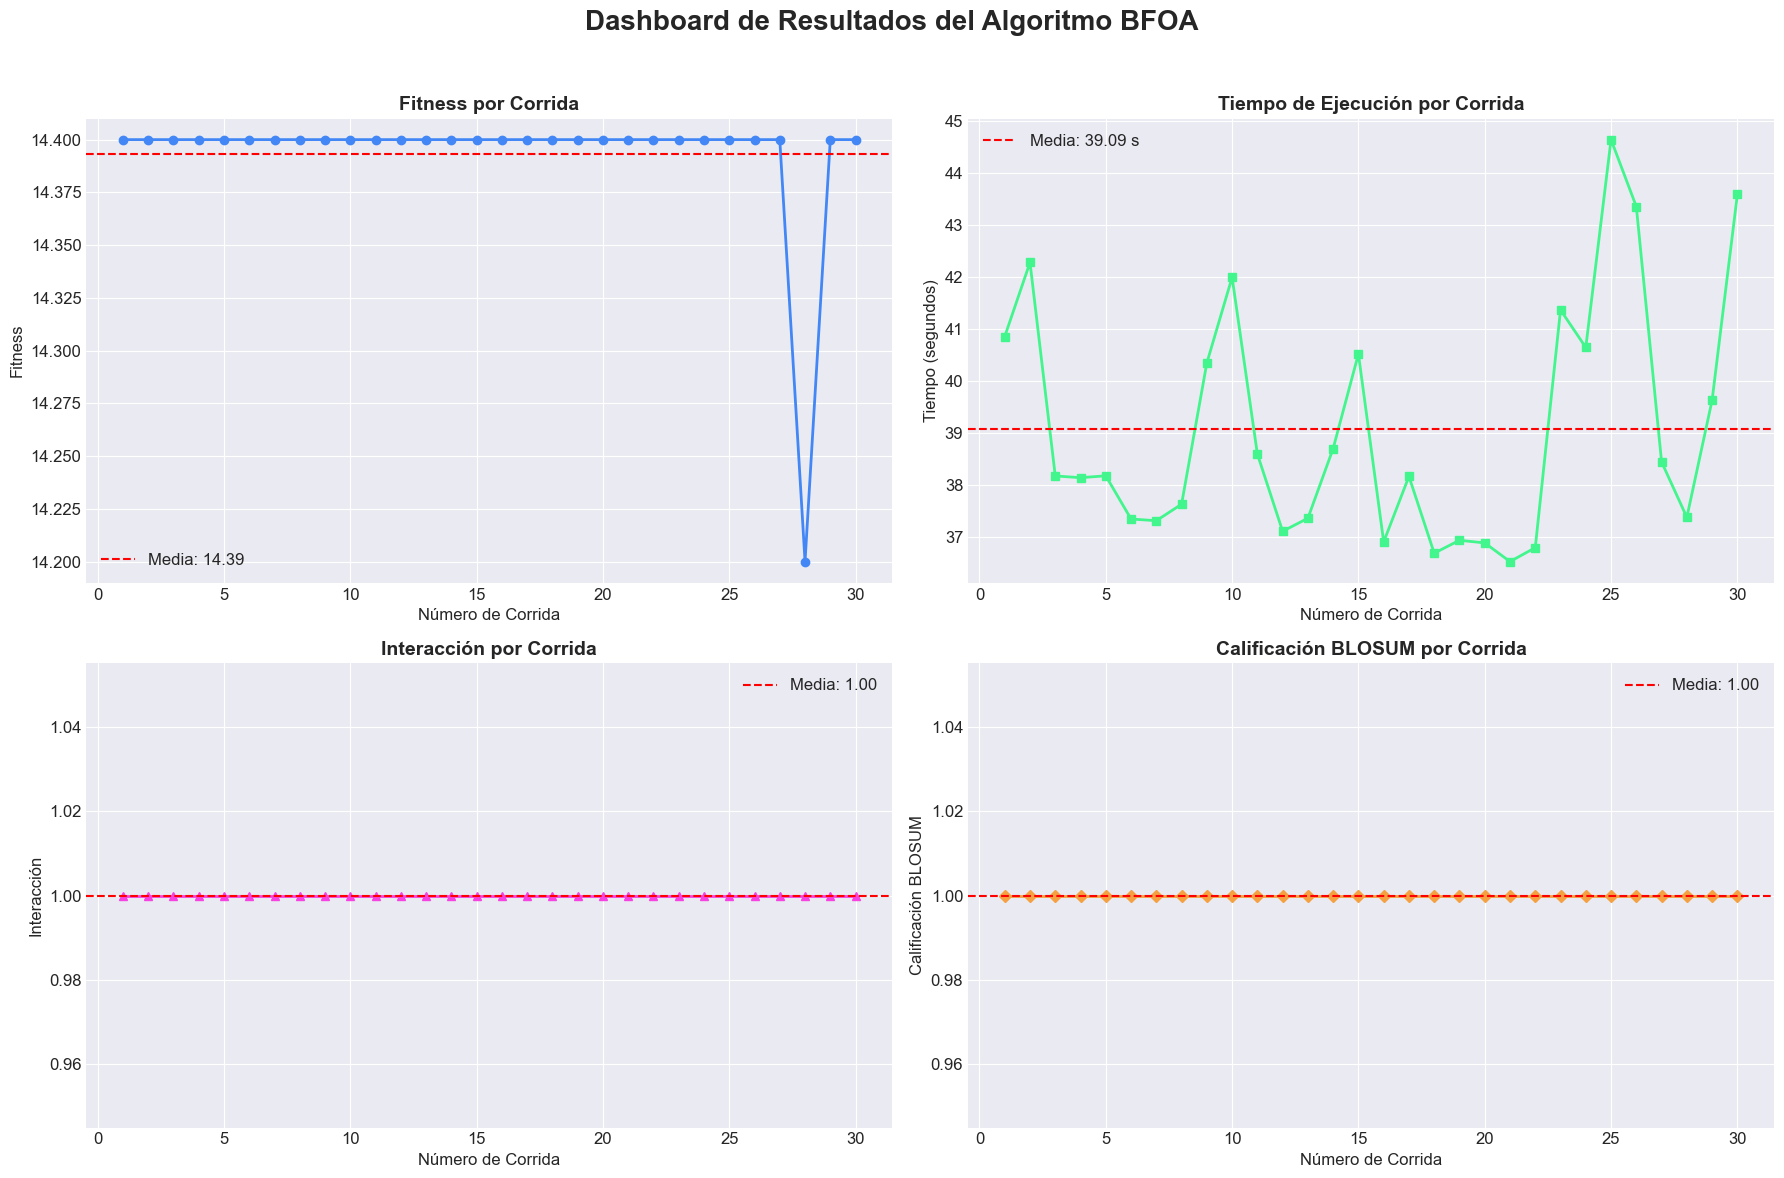

In [22]:
# Crear un dashboard con múltiples gráficas
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Dashboard de Resultados del Algoritmo BFOA', fontsize=20, fontweight='bold', y=0.98)

# Gráfica 1: Fitness
axs[0, 0].plot(df['corrida'], df['fitness'], marker='o', linestyle='-', linewidth=2, color='#4287f5')
axs[0, 0].axhline(y=df['fitness'].mean(), color='red', linestyle='--', 
                  label=f'Media: {df["fitness"].mean():.2f}')
axs[0, 0].set_title('Fitness por Corrida', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Número de Corrida')
axs[0, 0].set_ylabel('Fitness')
axs[0, 0].grid(True)
axs[0, 0].legend()

# Gráfica 2: Tiempo de ejecución
axs[0, 1].plot(df['corrida'], df['tiempo_ejecucion'], marker='s', linestyle='-', linewidth=2, color='#42f58d')
axs[0, 1].axhline(y=df['tiempo_ejecucion'].mean(), color='red', linestyle='--', 
                  label=f'Media: {df["tiempo_ejecucion"].mean():.2f} s')
axs[0, 1].set_title('Tiempo de Ejecución por Corrida', fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Número de Corrida')
axs[0, 1].set_ylabel('Tiempo (segundos)')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Gráfica 3: Interacción
axs[1, 0].plot(df['corrida'], df['interaccion'], marker='^', linestyle='-', linewidth=2, color='#f542e0')
axs[1, 0].axhline(y=df['interaccion'].mean(), color='red', linestyle='--', 
                  label=f'Media: {df["interaccion"].mean():.2f}')
axs[1, 0].set_title('Interacción por Corrida', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Número de Corrida')
axs[1, 0].set_ylabel('Interacción')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Gráfica 4: Calificación BLOSUM
axs[1, 1].plot(df['corrida'], df['calificacion_blosum'], marker='D', linestyle='-', linewidth=2, color='#f5a142')
axs[1, 1].axhline(y=df['calificacion_blosum'].mean(), color='red', linestyle='--', 
                  label=f'Media: {df["calificacion_blosum"].mean():.2f}')
axs[1, 1].set_title('Calificación BLOSUM por Corrida', fontsize=14, fontweight='bold')
axs[1, 1].set_xlabel('Número de Corrida')
axs[1, 1].set_ylabel('Calificación BLOSUM')
axs[1, 1].grid(True)
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('dashboard_resultados.png', dpi=300)
plt.show()

Análisis de Rendimiento

In [23]:
# Estadísticas descriptivas de los resultados
estadisticas = df.describe().T
estadisticas['rango'] = estadisticas['max'] - estadisticas['min']
estadisticas['coef_variacion'] = (estadisticas['std'] / estadisticas['mean']) * 100

# Mostrar estadísticas redondeadas a 2 decimales
estadisticas.round(2)

,count,mean,std,min,25%,50%,75%,max,rango,coef_variacion
corrida,30.0,15.50,8.80,1.00,8.25,15.50,22.75,30.00,29.0,56.80
fitness,30.0,14.39,0.04,14.20,14.40,14.40,14.40,14.40,0.2,0.25
tiempo_ejecucion,30.0,39.09,2.32,36.53,37.33,38.18,40.62,44.64,8.1,5.94
interaccion,30.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.0,0.00
calificacion_blosum,30.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.0,0.00


Gráfica Final de Rendimiento

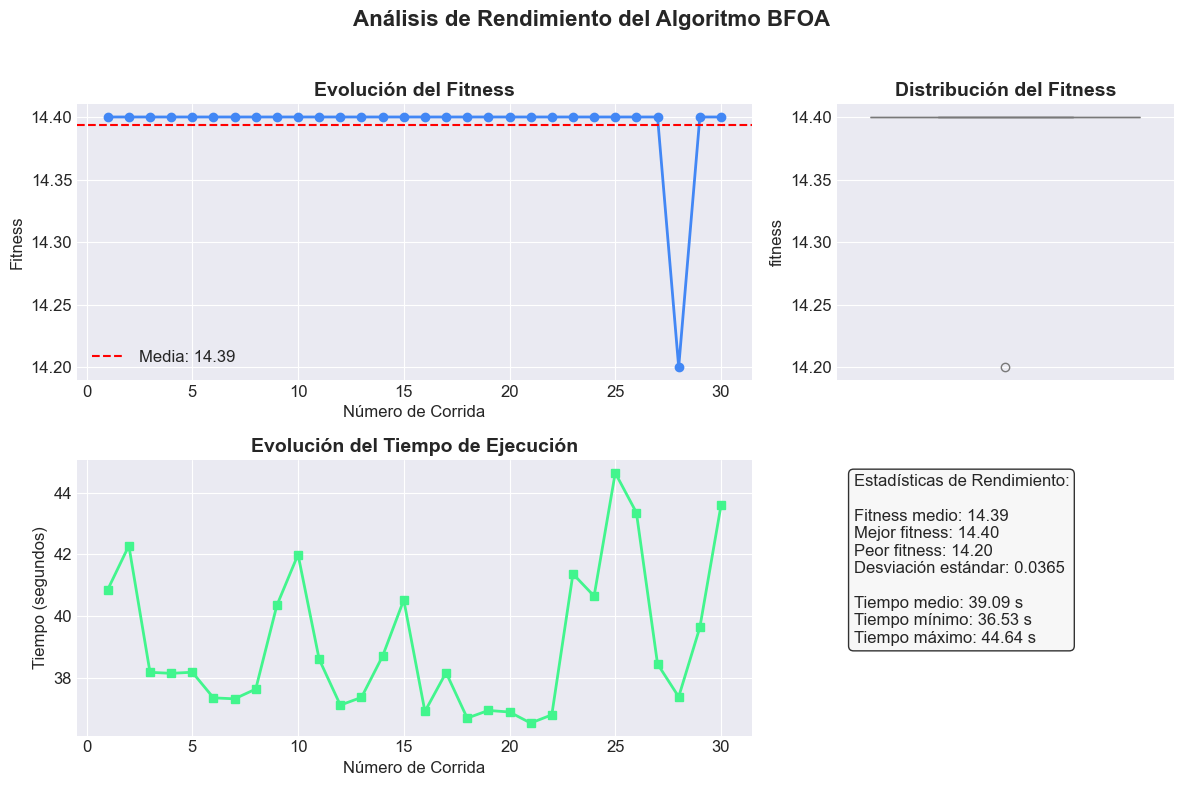

In [24]:
# Gráfica final con resultados del rendimiento del algoritmo
plt.figure(figsize=(12, 8))

# Crear subplots
gs = plt.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1])

# Gráfica principal: Evolución del fitness
ax1 = plt.subplot(gs[0, 0])
ax1.plot(df['corrida'], df['fitness'], marker='o', linestyle='-', linewidth=2, color='#4287f5')
ax1.axhline(y=df['fitness'].mean(), color='red', linestyle='--', label=f'Media: {df["fitness"].mean():.2f}')
ax1.set_title('Evolución del Fitness', fontsize=14, fontweight='bold')
ax1.set_xlabel('Número de Corrida')
ax1.set_ylabel('Fitness')
ax1.grid(True)
ax1.legend()

# Boxplot del fitness
ax2 = plt.subplot(gs[0, 1])
sns.boxplot(y=df['fitness'], ax=ax2, color='lightblue')
ax2.set_title('Distribución del Fitness', fontsize=14, fontweight='bold')
ax2.grid(True, axis='y')

# Evolución del tiempo de ejecución
ax3 = plt.subplot(gs[1, 0])
ax3.plot(df['corrida'], df['tiempo_ejecucion'], marker='s', linestyle='-', linewidth=2, color='#42f58d')
ax3.set_title('Evolución del Tiempo de Ejecución', fontsize=14, fontweight='bold')
ax3.set_xlabel('Número de Corrida')
ax3.set_ylabel('Tiempo (segundos)')
ax3.grid(True)

# Tabla con estadísticas
ax4 = plt.subplot(gs[1, 1])
ax4.axis('off')
stats_text = (
    f"Estadísticas de Rendimiento:\n\n"
    f"Fitness medio: {df['fitness'].mean():.2f}\n"
    f"Mejor fitness: {df['fitness'].max():.2f}\n"
    f"Peor fitness: {df['fitness'].min():.2f}\n"
    f"Desviación estándar: {df['fitness'].std():.4f}\n\n"
    f"Tiempo medio: {df['tiempo_ejecucion'].mean():.2f} s\n"
    f"Tiempo mínimo: {df['tiempo_ejecucion'].min():.2f} s\n"
    f"Tiempo máximo: {df['tiempo_ejecucion'].max():.2f} s"
)
ax4.text(0.05, 0.95, stats_text, transform=ax4.transAxes, fontsize=12, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='#f5f5f5', alpha=0.8))

plt.suptitle('Análisis de Rendimiento del Algoritmo BFOA', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('analisis_rendimiento.png', dpi=300)
plt.show()